In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import skimage.io
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
import random
from sklearn.metrics import accuracy_score
# Import packages
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
src1 = 'Data/train/flooded/'
src2 = 'Data/train/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

644


In [3]:
# Define parameters for LBP feature extraction
radius = 1
n_points = 8
METHOD = 'uniform'

In [4]:
print(len(image_paths))

644


In [5]:
grey_images = [ [] ] * len(image_paths)
lbp_features = [ [] ] * len(image_paths)
lbp_histograms = [ [] ] * len(image_paths)
labels=[]
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    mean_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    grey_image = rgb2gray(mean_image)
    grey_images[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features[i] = lbp
    lbp_histograms[i] = hist
    if "non" in image_path:
        labels.append(0)
    else:
        labels.append(1)
    i += 1

  0%|          | 0/644 [00:00<?, ?it/s]/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 644/644 [01:14<00:00,  8.65it/s]


In [6]:
len(lbp_features), lbp_features[0].shape

(644, (224, 224))

In [8]:
temp = list(zip(lbp_features, labels))
random.shuffle(temp)
lbp_features, labels = zip(*temp)

In [9]:
lbp_features= np.array(lbp_features)

In [10]:
nsamples, nx, ny = lbp_features.shape

In [11]:
d2_train_dataset = lbp_features.reshape((nsamples,nx*ny))

In [12]:
d2_train_dataset.shape

(644, 50176)

In [26]:
clf = svm.SVC(kernel='poly', C=3)

clf.fit(d2_train_dataset, labels)

SVC(C=3, kernel='poly')

In [14]:
src1 = 'Data/val/flooded/'
src2 = 'Data/val/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

138


In [15]:
grey_images_val = [ [] ] * len(image_paths)
lbp_features_val = [ [] ] * len(image_paths)
lbp_histograms_val = [ [] ] * len(image_paths)
labels_val=[]
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    mean_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    grey_image = rgb2gray(mean_image)
    grey_images_val[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_val[i] = lbp
    lbp_histograms_val[i] = hist
    if "non" in image_path:
        labels_val.append(0)
    else:
        labels_val.append(1)
    i += 1

  0%|          | 0/138 [00:00<?, ?it/s]/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 138/138 [00:20<00:00,  6.87it/s]


In [16]:
lbp_features_val=np.array(lbp_features_val)

In [17]:
nsamples, nx, ny = lbp_features_val.shape

In [18]:
d2_val_dataset = lbp_features_val.reshape((nsamples,nx*ny))

In [27]:
predictions=clf.predict(d2_val_dataset)

In [28]:
# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)
print(classification_report(labels_val,predictions))

Accuracy   : 0.5434782608695652
              precision    recall  f1-score   support

           0       0.59      0.28      0.38        69
           1       0.53      0.81      0.64        69

    accuracy                           0.54       138
   macro avg       0.56      0.54      0.51       138
weighted avg       0.56      0.54      0.51       138



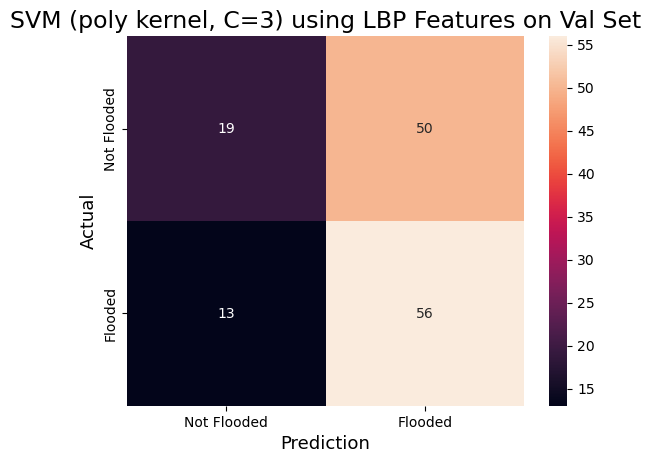

In [29]:
# Compute the confusion matrix.
cm = confusion_matrix(labels_val,predictions)
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('SVM (poly kernel, C=3) using LBP Features on Val Set',fontsize=17)
plt.show()

In [30]:
clf = svm.SVC(kernel='rbf', C=3)
clf.fit(d2_train_dataset, labels)   

SVC(C=3)

In [31]:
predictions=clf.predict(d2_val_dataset)

In [32]:
# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)
print(classification_report(labels_val,predictions))

Accuracy   : 0.7246376811594203
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        69
           1       0.80      0.59      0.68        69

    accuracy                           0.72       138
   macro avg       0.74      0.72      0.72       138
weighted avg       0.74      0.72      0.72       138



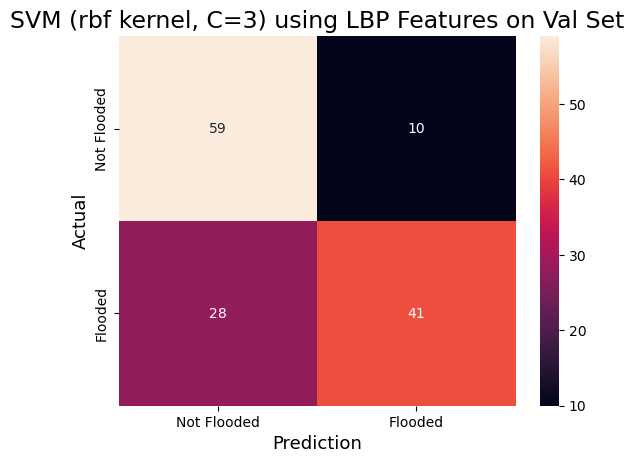

In [33]:
# Compute the confusion matrix.
cm = confusion_matrix(labels_val,predictions)
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('SVM (rbf kernel, C=3) using LBP Features on Val Set',fontsize=17)
plt.show()

In [44]:
clf = svm.SVC(kernel='rbf', C=3,gamma=0.05)
clf.fit(d2_train_dataset, labels)

In [41]:
predictions=clf.predict(d2_val_dataset)

In [42]:
# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)
print(classification_report(labels_val,predictions))

Accuracy   : 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.50      1.00      0.67        69

    accuracy                           0.50       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.25      0.50      0.33       138



/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


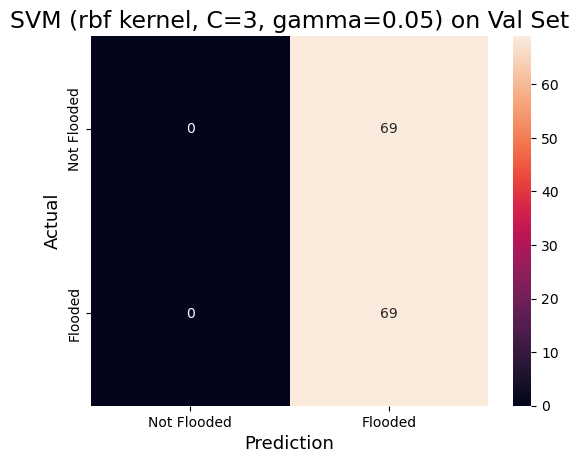

In [43]:
# Compute the confusion matrix.
cm = confusion_matrix(labels_val,predictions)
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('SVM (rbf kernel, C=3, gamma=0.05) on Val Set',fontsize=17)
plt.show()